## ML-Prac. HW03- Question03(Linear Regression)
### Alireza Ansari
### Student ID: 400123114

***

The purpose of this section is to implement an algorithm to estimate data based on the linear regression algorithm. The attached data is related to the average house price in different areas of California. This data includes 8 numerical features and one nominal feature. The number of samples is 20640. And the house prices are in the value_house_median column.

First, we need to import necessary Libraries:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In the following section, we import the dataset called "housing.csv" and ecplore it by using "describe" and "info" command

## Importing the Data

In [4]:
House_df_main = pd.read_csv('housing.csv')
House_df = House_df_main.copy()

House_df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
5,-122.25,37.85,52,919,213.0,413,193,4.0368,269700,NEAR BAY
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,299200,NEAR BAY
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,241400,NEAR BAY
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,226700,NEAR BAY
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,261100,NEAR BAY


In [5]:
House_df.describe(include = 'all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


In [6]:
House_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


And to know more about correlation in the dataset, we can plot Initial Correlation as follows:

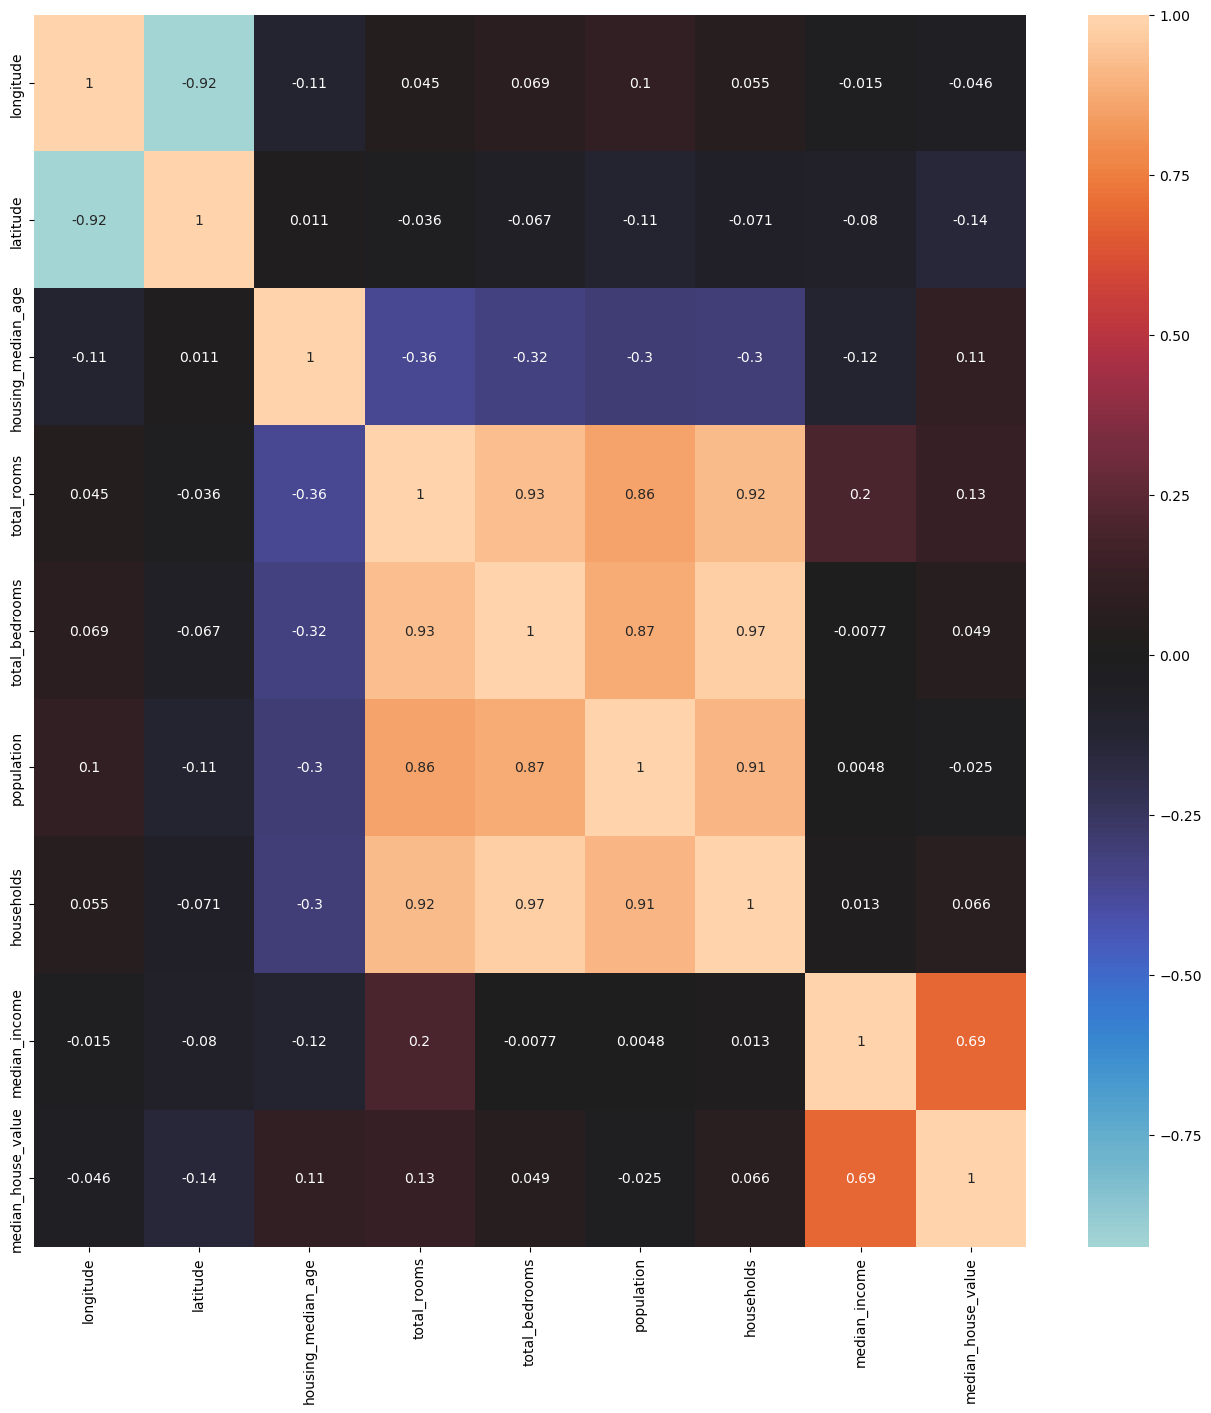

In [15]:
plt.figure(figsize = (16, 16))
sns_plot01 = sns.heatmap(House_df.corr(), annot = True, center = 0)
fig01 = sns_plot01.get_figure()
fig01.savefig("HeatMap.png", dpi = 500)

 ***


## A. Pre-processing the Data

In this part, we like to pre process the data. For this puspose, first, we replace the missed value of each feature with the mean value.

### First: Missing Values

In [7]:
House_df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
House_df.fillna(House_df.mean(), inplace=True)

House_df.head(344)

C:\Users\alire\AppData\Local\Temp\ipykernel_19996\3079463771.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  House_df.fillna(House_df.mean(), inplace=True)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.000000,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.000000,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.000000,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.000000,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.000000,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
339,-122.18,37.75,45,330,76.000000,282,80,4.0469,80700,NEAR BAY
340,-122.18,37.75,46,941,218.000000,621,195,1.3250,87100,NEAR BAY
341,-122.17,37.75,38,992,537.870553,732,259,1.6196,85100,NEAR BAY
342,-122.18,37.75,45,990,261.000000,901,260,2.1731,82000,NEAR BAY


In [9]:
House_df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

***

### Second: Using "Dummy Variable Indicator" method

At the second stage of pre processing, we will use "Dummy Variable Indicator" method to convert the Non-numeric feature "ocean_proximity" to numeric feature.

In [10]:
print("The variation in categorical feature: {}".format(House_df['ocean_proximity'].unique()))

House_df_Dum = pd.get_dummies(House_df, columns = ['ocean_proximity'])

House_df_Dum.head()

The variation in categorical feature: ['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,0,1,0


***

### Third: Scaling the Data

At the last stage of pre processing, to map all datas between zero and one, we need to scale them as follows:

In [67]:
## Min-Max Scaling

House_df_Dum_sc = (House_df_Dum - House_df_Dum.min()) / (House_df_Dum.max() - House_df_Dum.min())
House_df_Dum_sc.head(10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,0.902266,0.0,0.0,0.0,1.0,0.0
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,0.708247,0.0,0.0,0.0,1.0,0.0
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,0.695051,0.0,0.0,0.0,1.0,0.0
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,0.672783,0.0,0.0,0.0,1.0,0.0
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,0.674638,0.0,0.0,0.0,1.0,0.0
5,0.209163,0.564293,1.000000,0.023323,0.032899,0.011491,0.031574,0.243921,0.525155,0.0,0.0,0.0,1.0,0.0
6,0.209163,0.563231,1.000000,0.064423,0.075729,0.030578,0.084361,0.217873,0.585979,0.0,0.0,0.0,1.0,0.0
7,0.209163,0.563231,1.000000,0.078895,0.106456,0.032344,0.106233,0.180694,0.466804,0.0,0.0,0.0,1.0,0.0
8,0.208167,0.563231,0.803922,0.064932,0.103042,0.033717,0.097681,0.108998,0.436495,0.0,0.0,0.0,1.0,0.0
9,0.209163,0.563231,1.000000,0.090213,0.109559,0.043387,0.117250,0.220087,0.507423,0.0,0.0,0.0,1.0,0.0


***

## B. Splitting the data

In the following section, we will Split the data randomly into three parts, 60% - 20% - 20% respectively for training, validation and test set.


In [68]:
from sklearn.model_selection import train_test_split

Y = House_df_Dum_sc['median_house_value']
X = House_df_Dum_sc.drop('median_house_value', axis = 1)

# Split data for generating "Test" subset
[X_train, X_test, Y_train, Y_test] = train_test_split(X, Y, test_size = 0.2, shuffle = True, random_state = 42)

# Split Train subset to extract "Validation" subset\
[X_train, X_val, Y_train, Y_val] = train_test_split(X_train, Y_train, test_size=0.25, shuffle = True, random_state = 42) # 0.25 x 0.8 = 0.2

print("X_train shape: {}".format(X_train.shape))
print("Y_train shape: {}".format(Y_train.shape))
print('\n')

print("X_test  shape: {}".format(X_test.shape))
print("Y_test  shape: {}".format(Y_test.shape))
print('\n')

print("X_val   shape: {}".format(X_val.shape))
print("Y_val   shape: {}".format(Y_val.shape))


X_train shape: (12384, 13)
Y_train shape: (12384,)


X_test  shape: (4128, 13)
Y_test  shape: (4128,)


X_val   shape: (4128, 13)
Y_val   shape: (4128,)


***

## C & D. Run the linear regularization algorithm with regularization and early stopping as follows:

#### I• For 5 learning rate 0.1, 0.3, 0.5, 0.7 and 1.

#### II• For 4 regularization coefficients 0, 0.1, 1, 10.

#### III• Plot the loss curves for the training and validation data in one plot.(Totally 20 plots.)

First, by developing the linear regression model using "SGDRegressor", we extract the best model error as follows:

In [69]:
from sklearn.datasets import make_regression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

model = SGDRegressor(loss = 'squared_error', penalty='l2', alpha = 0.1, max_iter = 100, learning_rate='constant', eta0 = 0.1)
model.fit(X_train, Y_train)
Y_pred_test = model.predict(X_test)
test_error = mean_squared_error(Y_test, Y_pred_test)
print(f"Best model test error: {test_error:.2f}")


Y_test

Best model test error: 0.05


20046    0.067424
3024     0.063507
15663    1.000000
20484    0.419794
9814     0.542268
           ...   
15362    0.511959
16623    0.519175
18086    1.000000
2144     0.118146
3665     0.281444
Name: median_house_value, Length: 4128, dtype: float64

In the following section, for values of learning rate and regularization as follows:

etas = [0.1, 0.3, 0.5, 0.7, 1]

alphas = [0, 0.1, 1, 10]

for linear regressor, we calculate 20 variation of models and select and report the best one:


Early stopping after iteration 2
Early stopping after iteration 2
Early stopping after iteration 1
Early stopping after iteration 3
Early stopping after iteration 2
Early stopping after iteration 1
Early stopping after iteration 2
Early stopping after iteration 1
Early stopping after iteration 1
Early stopping after iteration 1
Early stopping after iteration 1
Early stopping after iteration 3
Early stopping after iteration 1
Early stopping after iteration 1
Early stopping after iteration 3
Early stopping after iteration 1
Early stopping after iteration 2
Early stopping after iteration 2
Early stopping after iteration 4
Early stopping after iteration 6


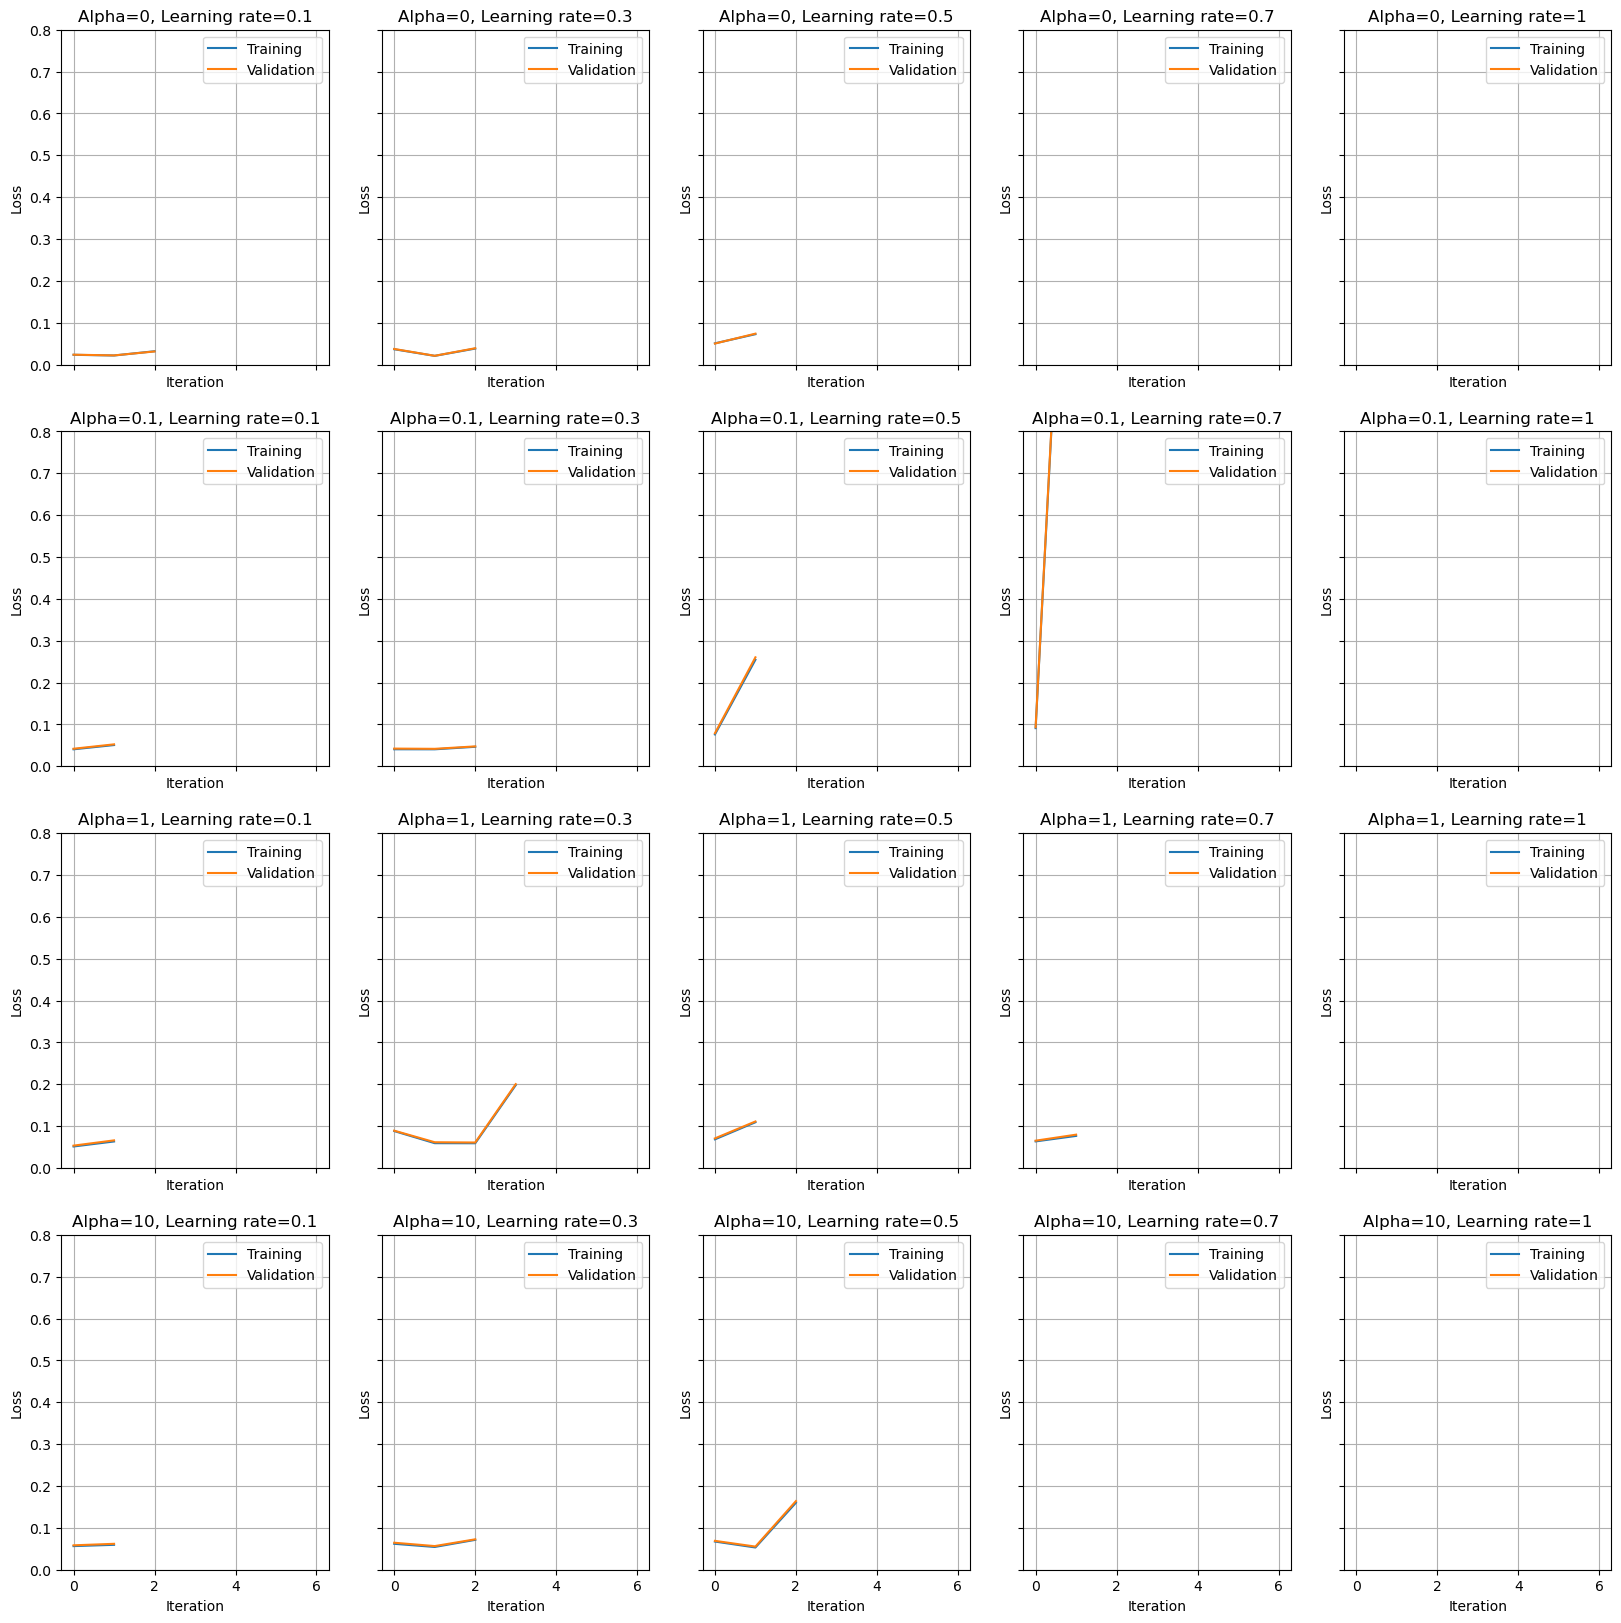

best_params: {'alpha': 0, 'average': False, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.1, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'constant', 'loss': 'squared_error', 'max_iter': 100, 'n_iter_no_change': 5, 'penalty': 'l2', 'power_t': 0.25, 'random_state': None, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
best_train_losses: [0.031684201231266446, 0.038042697135204216, 0.072423186048143, 1.867263652279749e+23, 1.3796766529277163e+24, 0.0506273772505134, 0.046474558297110946, 0.25445187952326304, 1.9163070635361577, 1.0279370040993459e+24, 0.0633562158983543, 0.19797671006678627, 0.10926228735856636, 0.07663367858940101, 2.3907174381670934e+24, 0.059498508618899715, 0.07137209408985747, 0.16004849440337912, 82937725.43216221, 2.7700068848923786e+24]
Best model test error: 0.02


20046    0.067424
3024     0.063507
15663    1.000000
20484    0.419794
9814     0.542268
           ...   
15362    0.511959
16623    0.519175
18086    1.000000
2144     0.118146
3665     0.281444
Name: median_house_value, Length: 4128, dtype: float64

In [70]:
from sklearn.datasets import make_regression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

# Define learning rates to try
etas = [0.1, 0.3, 0.5, 0.7, 1]
n1 = len(etas)

# Define regularization coefficients to try
alphas = [0, 0.1, 1, 10]
n2 = len(alphas)

# Define early stopping parameter
max_iter = 100

# Train models with different hyperparameters and plot loss curves
fig, axs = plt.subplots(len(alphas), len(etas), figsize=(20, 20), sharex=True, sharey=True)

best_params = None
best_train_losses=[]
for i, alpha in enumerate(alphas):
    for j, eta in enumerate(etas):
        # Create SGDRegressor object with L2 regularization and the specified hyperparameters
        model = SGDRegressor(loss = 'squared_error', penalty='l2', alpha = alpha, max_iter = max_iter
                             , learning_rate='constant', eta0 = eta)
        # Train model with early stopping and plot loss curves
        train_losses = []
        val_losses = []
        best_test_error = np.inf
        tolerance = 1e-4
        for k in range(max_iter):
            model.partial_fit(X_train, Y_train)
            Y_pred_train = model.predict(X_train)
            train_error = mean_squared_error(Y_train, Y_pred_train)
            train_losses.append(train_error)
            
            Y_pred_val = model.predict(X_val)
            val_error = mean_squared_error(Y_val, Y_pred_val)
            val_losses.append(val_error)
            
            if val_error < best_test_error - tolerance:
                best_test_error = val_error
            else:
                print(f"Early stopping after iteration {k}")
                break
        best_train_losses.append(train_error)
        if  train_error<=np.min(best_train_losses):
          best_params = model.get_params()  
        # Plot training and validation loss curves
        axs[i, j].plot(train_losses, label='Training')
        axs[i, j].plot(val_losses, label='Validation')
        axs[i, j].set_title(f"Alpha={alpha}, Learning rate={eta}")
        axs[i, j].set_xlabel('Iteration')
        axs[i, j].set_ylabel('Loss')
        axs[i, j].set_ylim([0, 0.8])
        axs[i, j].legend()
        axs[i, j].grid()
        
#plt.savefig('Loss Curves.png', dpi = 300)
plt.show()

# Evaluate best model on test set
print(f'best_params: {best_params}')
print(f'best_train_losses: {best_train_losses}')
model.set_params(**best_params)
model.fit(X_test, Y_test)
Y_pred_test = model.predict(X_test)
test_error = mean_squared_error(Y_test, Y_pred_test)
print(f"Best model test error: {test_error:.2f}")

Y_test

### As we can see from the results above, the Best model test error is 0.02

***

## E. Adding new features


go back to the scaling data level, calculate and add the following two features for each sample. Then scale the data.


• Population_per_household = 𝑝𝑜𝑝𝑢𝑙𝑎𝑡𝑖𝑜𝑛 / ℎ𝑜𝑢𝑠𝑒ℎ𝑜𝑙𝑑𝑠


• rooms_per_household = 𝑡𝑜𝑡𝑎𝑙_𝑟𝑜𝑜𝑚𝑠 / ℎ𝑜𝑢𝑠𝑒ℎ𝑜𝑙𝑑𝑠


by using the code below, we will add newe features to dfataset and we will call the new dataset "House_df_Dum_sc_New.head"


In [71]:
House_df_Dum_sc_New = House_df_Dum_sc

House_df_Dum_sc_New['Population_per_household'] = House_df_Dum_sc_New['population'] / House_df_Dum_sc_New['households']

House_df_Dum_sc_New['rooms_per_household'] = House_df_Dum_sc_New['total_rooms'] / House_df_Dum_sc_New['households']


House_df_Dum_sc_New.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,Population_per_household,rooms_per_household
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,0.902266,0.0,0.0,0.0,1.0,0.0,0.434954,1.086346
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,0.708247,0.0,0.0,0.0,1.0,0.0,0.359460,0.965379
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,0.695051,0.0,0.0,0.0,1.0,0.0,0.477416,1.287385
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,0.672783,0.0,0.0,0.0,1.0,0.0,0.433909,0.902431
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,0.674638,0.0,0.0,0.0,1.0,0.0,0.371261,0.974131


In the following section, we will repeat the last section properties with new dataset.

First, we need to split the new dataset

In [72]:
from sklearn.model_selection import train_test_split

Y_new = House_df_Dum_sc_New['median_house_value']
X_new = House_df_Dum_sc_New.drop('median_house_value', axis = 1)

# Split data for generating "Test" subset
[X_train_new, X_test_new, Y_train_new, Y_test_new] = train_test_split(X_new, Y_new, test_size = 0.2, shuffle = True, random_state = 42)

# Split Train subset to extract "Validation" subset\
[X_train_new, X_val_new, Y_train_new, Y_val_new] = train_test_split(X_train_new, Y_train_new, test_size=0.25, shuffle = True, random_state = 42) # 0.25 x 0.8 = 0.2

print("X_train_new shape: {}".format(X_train_new.shape))
print("Y_train_new shape: {}".format(Y_train_new.shape))
print('\n')

print("X_test_new  shape: {}".format(X_test_new.shape))
print("Y_test_new  shape: {}".format(Y_test_new.shape))
print('\n')

print("X_val_new   shape: {}".format(X_val_new.shape))
print("Y_val_new   shape: {}".format(Y_val_new.shape))

X_train_new shape: (12384, 15)
Y_train_new shape: (12384,)


X_test_new  shape: (4128, 15)
Y_test_new  shape: (4128,)


X_val_new   shape: (4128, 15)
Y_val_new   shape: (4128,)


Then, by developing the linear regression model using "SGDRegressor", we extract the best model error as follows:

In [74]:
from sklearn.datasets import make_regression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

model = SGDRegressor(loss = 'squared_error', penalty='l2', alpha = 0.1, max_iter = 100, learning_rate='constant', eta0 = 0.1)
model.fit(X_train, Y_train)
Y_pred_test = model.predict(X_test)
test_error = mean_squared_error(Y_test, Y_pred_test)
print(f"Best model test error: {test_error:.2f}")


Y_test

Best model test error: 0.05


20046    0.067424
3024     0.063507
15663    1.000000
20484    0.419794
9814     0.542268
           ...   
15362    0.511959
16623    0.519175
18086    1.000000
2144     0.118146
3665     0.281444
Name: median_house_value, Length: 4128, dtype: float64

## As we can see, the Best model test error has been a significant decrease :)

In the following section, for values of learning rate and regularization as follows:

etas = [0.1, 0.3, 0.5, 0.7, 1]

alphas = [0, 0.1, 1, 10]

for linear regressor, we calculate 20 variation of models and select and report the best one:


Early stopping after iteration 2
Early stopping after iteration 2
Early stopping after iteration 2
Early stopping after iteration 1
Early stopping after iteration 2
Early stopping after iteration 1
Early stopping after iteration 2
Early stopping after iteration 2
Early stopping after iteration 2
Early stopping after iteration 2
Early stopping after iteration 3
Early stopping after iteration 2
Early stopping after iteration 3
Early stopping after iteration 1
Early stopping after iteration 2
Early stopping after iteration 2
Early stopping after iteration 2
Early stopping after iteration 1
Early stopping after iteration 1
Early stopping after iteration 3


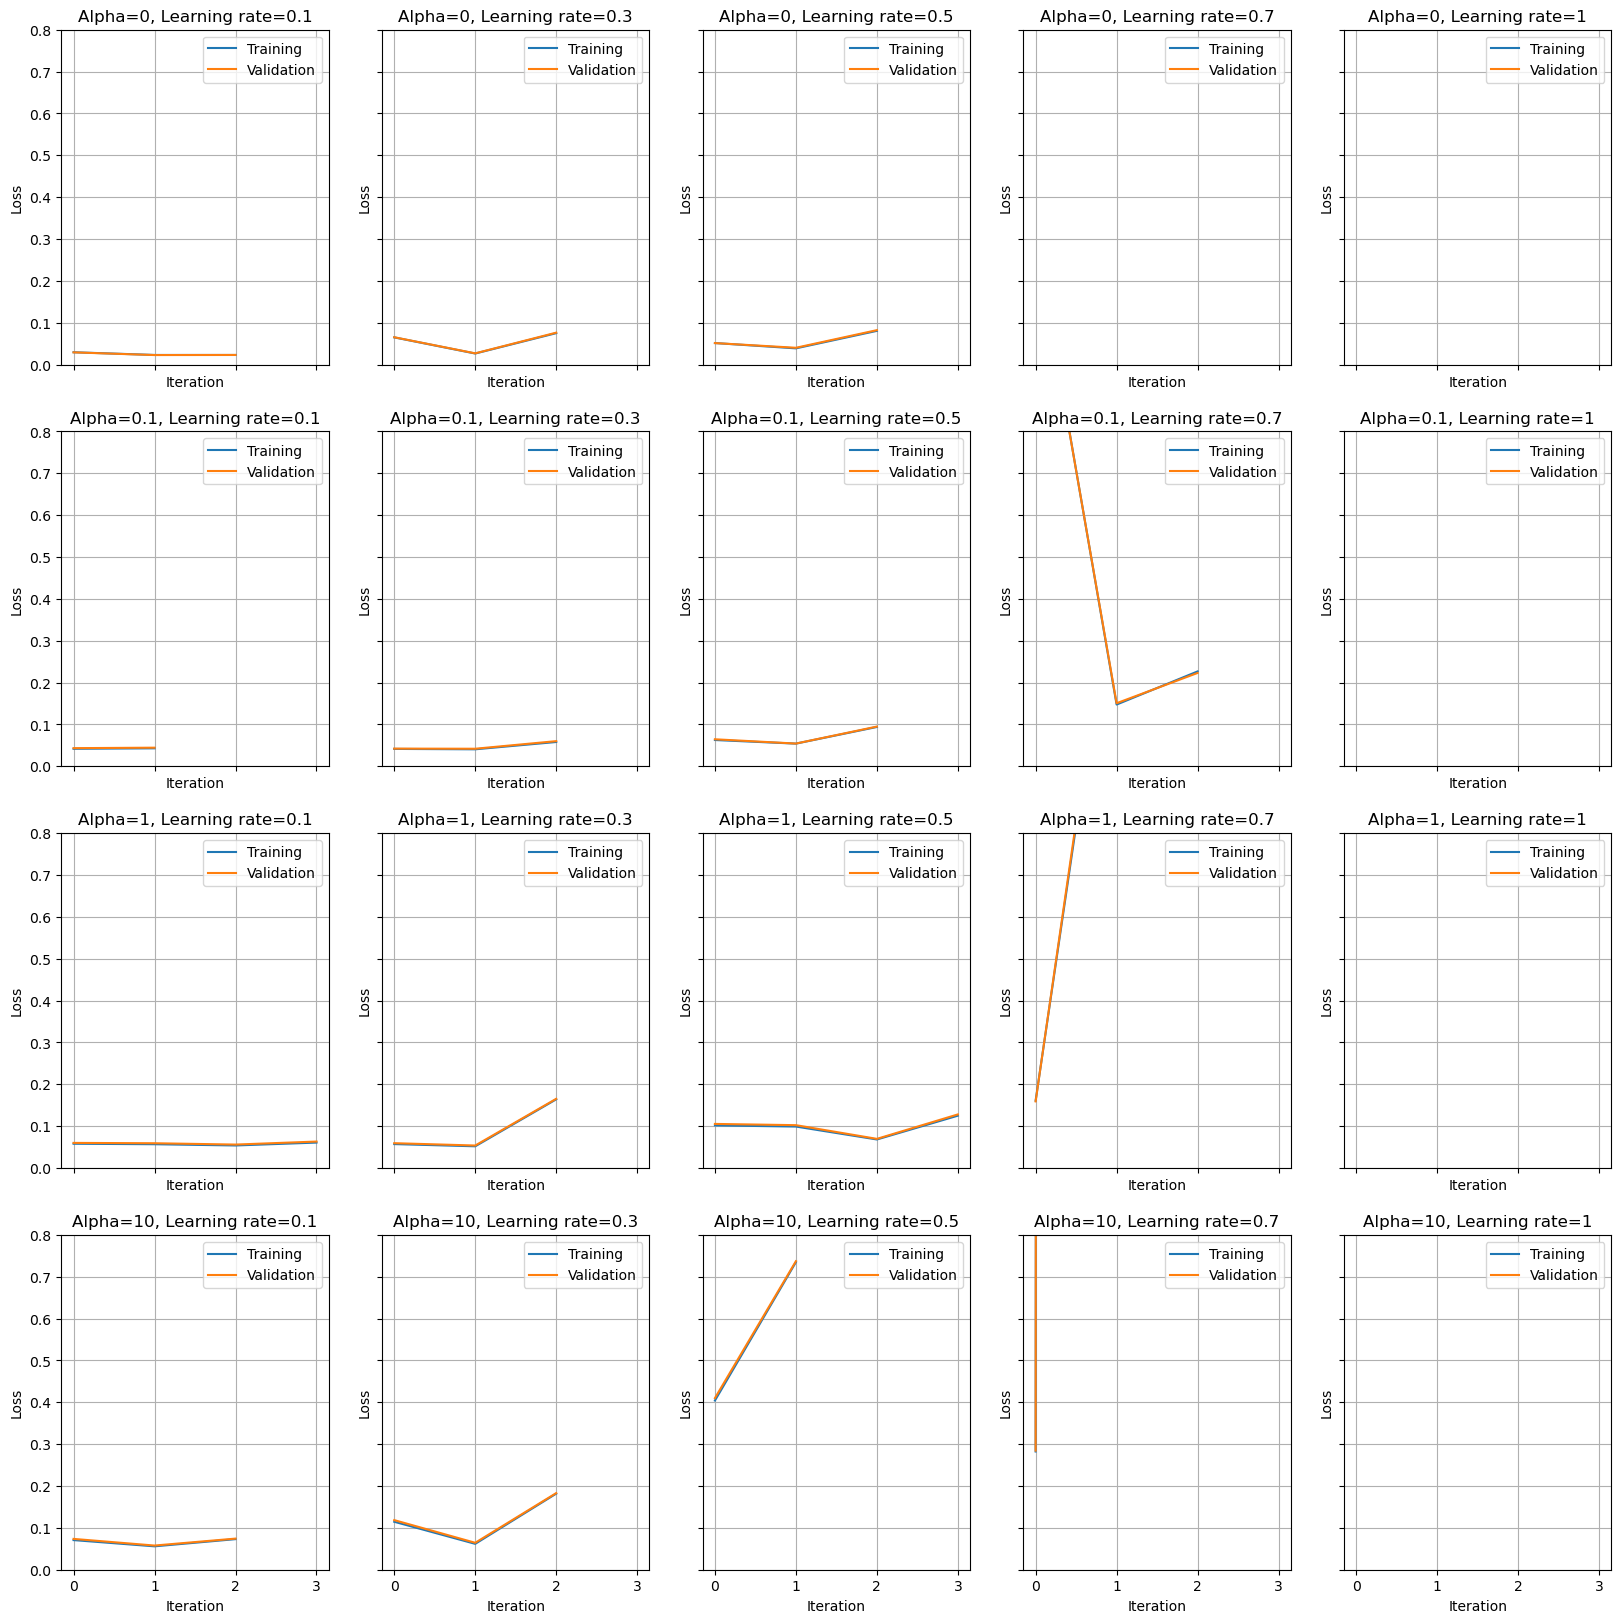

best_params: {'alpha': 0, 'average': False, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.1, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'constant', 'loss': 'squared_error', 'max_iter': 100, 'n_iter_no_change': 5, 'penalty': 'l2', 'power_t': 0.25, 'random_state': None, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
best_train_losses: [0.02277313649174525, 0.07491055354680991, 0.08038676965444153, 6.099315378644993e+23, 2.43770518764823e+24, 0.042821143791581445, 0.05793623653358816, 0.09383248605413702, 0.2265582900639096, 2.6410545472869923e+23, 0.060705317090519885, 0.16403602886120572, 0.1250103982094183, 1.4739706113549726, 2.8811879859887045e+24, 0.07308929019835039, 0.181801241252295, 0.7350252983211245, 219.6291855315864, 3.1369676135894595e+24]
Best model test error: 0.03


20046    0.067424
3024     0.063507
15663    1.000000
20484    0.419794
9814     0.542268
           ...   
15362    0.511959
16623    0.519175
18086    1.000000
2144     0.118146
3665     0.281444
Name: median_house_value, Length: 4128, dtype: float64

In [75]:
from sklearn.datasets import make_regression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

# Define learning rates to try
etas = [0.1, 0.3, 0.5, 0.7, 1]
n1 = len(etas)

# Define regularization coefficients to try
alphas = [0, 0.1, 1, 10]
n2 = len(alphas)

# Define early stopping parameter
max_iter = 100

# Train models with different hyperparameters and plot loss curves
fig, axs = plt.subplots(len(alphas), len(etas), figsize=(20, 20), sharex=True, sharey=True)

best_params = None
best_train_losses=[]
for i, alpha in enumerate(alphas):
    for j, eta in enumerate(etas):
        # Create SGDRegressor object with L2 regularization and the specified hyperparameters
        model = SGDRegressor(loss = 'squared_error', penalty='l2', alpha = alpha, max_iter = max_iter
                             , learning_rate='constant', eta0 = eta)
        # Train model with early stopping and plot loss curves
        train_losses = []
        val_losses = []
        best_test_error = np.inf
        tolerance = 1e-4
        for k in range(max_iter):
            model.partial_fit(X_train, Y_train)
            Y_pred_train = model.predict(X_train)
            train_error = mean_squared_error(Y_train, Y_pred_train)
            train_losses.append(train_error)
            
            Y_pred_val = model.predict(X_val)
            val_error = mean_squared_error(Y_val, Y_pred_val)
            val_losses.append(val_error)
            
            if val_error < best_test_error - tolerance:
                best_test_error = val_error
            else:
                print(f"Early stopping after iteration {k}")
                break
        best_train_losses.append(train_error)
        if  train_error<=np.min(best_train_losses):
          best_params = model.get_params()  
        # Plot training and validation loss curves
        axs[i, j].plot(train_losses, label='Training')
        axs[i, j].plot(val_losses, label='Validation')
        axs[i, j].set_title(f"Alpha={alpha}, Learning rate={eta}")
        axs[i, j].set_xlabel('Iteration')
        axs[i, j].set_ylabel('Loss')
        axs[i, j].set_ylim([0, 0.8])
        axs[i, j].legend()
        axs[i, j].grid()
        
#plt.savefig('Loss Curves.png', dpi = 300)
plt.show()

# Evaluate best model on test set
print(f'best_params: {best_params}')
print(f'best_train_losses: {best_train_losses}')
model.set_params(**best_params)
model.fit(X_test, Y_test)
Y_pred_test = model.predict(X_test)
test_error = mean_squared_error(Y_test, Y_pred_test)
print(f"Best model test error: {test_error:.2f}")

Y_test

## As we can see, the Best model test error has been a significant decrease :)